# Dimension Reduction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as ssd
from scipy.spatial import distance
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
import subprocess

In [4]:
# Build new simulation data
# subprocess.run("python 1-Data-step.py", shell=True)

# Load data set
dmat = np.load('/home/server/pi/homes/woodilla/Projects/Anomalous-Detection-Browning-Simulation/data/jsd_mat.npy')


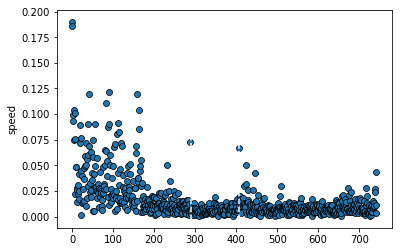

In [5]:
#------------------------------------------------------------------------
# Metric-MDS 5-dimensions
nmds = MDS(n_components=5, metric=True, dissimilarity='precomputed')
nmds_dat = nmds.fit_transform(dmat)

ndat = pd.DataFrame({"x": nmds_dat[:, 0], "y": nmds_dat[:, 1]})

ndat['x2'] = ndat['x'].shift(-1)
ndat['y2'] = ndat['y'].shift(-1)

ndat['distance'] = np.sqrt( (ndat['x'] - ndat['x2'])**2 + (ndat['y'] - ndat['y2'])**2 )

# Calculate speed
ndat['speed'] = ndat['distance']/1

# Plot speed
plt = sns.scatterplot(x=range(len(ndat)) ,y=ndat['speed'], edgecolor="black")
plt.axvline(289, ls='--', color='white')
plt.axvline(407, ls='--', color='white')

In [ ]:
#------------------------------------------------------------------------
# Nonmetric-MDS 5-dimensions
nmds = MDS(n_components=5, metric=False, dissimilarity='precomputed')
nmds_dat = nmds.fit_transform(dmat)

ndat = pd.DataFrame({"x": nmds_dat[:, 0], "y": nmds_dat[:, 1]})

ndat['x2'] = ndat['x'].shift(-1)
ndat['y2'] = ndat['y'].shift(-1)

ndat['distance'] = np.sqrt( (ndat['x'] - ndat['x2'])**2 + (ndat['y'] - ndat['y2'])**2 )

# Calculate speed
ndat['speed'] = ndat['distance']/1


# Plot speed
plt = sns.scatterplot(x=range(len(ndat)) ,y=ndat['speed'], edgecolor="black")
plt.axvline(289, ls='--', color='white')
plt.axvline(407, ls='--', color='white')

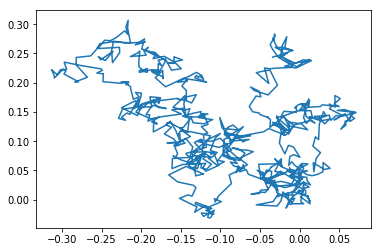

In [19]:
#------------------------------------------------------------------------
# nMDS using ISO Mapping
nmds = Isomap(n_components=5)
nmds_dat = nmds.fit_transform(dmat)
ndat = pd.DataFrame({"x": nmds_dat[:, 0], "y": nmds_dat[:, 1]})

ndat['x2'] = ndat['x'].shift(-1)
ndat['y2'] = ndat['y'].shift(-1)

ndat['distance'] = np.sqrt( (ndat['x'] - ndat['x2'])**2 + (ndat['y'] - ndat['y2'])**2 )

# Calculate speed
ndat['speed'] = ndat['distance']/1


# Plot speed
plt = sns.scatterplot(x=range(len(ndat)) ,y=ndat['speed'], edgecolor="black")
plt.axvline(289, ls='--', color='white')
plt.axvline(407, ls='--', color='white')

In [27]:
# Limit outliers
plt = sns.scatterplot(x=range(len(ndat)) ,y=ndat['speed'], edgecolor="black")
plt.axvline(289, ls='--', color='white')
plt.axvline(407, ls='--', color='white')
plt.set_ylim([0, .5])

Min Distance: 0.0  Max Distance: 61.42407748778972
28.854772202995875 70.82828541937812


/home/server/pi/homes/woodilla/.conda/envs/baseDS_env/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
